In [1]:
import xml.etree.ElementTree as ET
from urllib import request
from xml.dom import minidom 
from io import BytesIO

req=request.urlopen('http://api.worldbank.org/countries/fin/indicators/SL.UEM.TOTL.ZS').read()
root=ET.parse(BytesIO(req)).getroot()
root.attrib


{'page': '1', 'pages': '2', 'per_page': '50', 'total': '60'}

In [2]:

numPage=int(root.attrib['pages'])
numPage


2

In [3]:
for child in root:
    for el in child:
        print(el.tag)
    break

{http://www.worldbank.org}indicator
{http://www.worldbank.org}country
{http://www.worldbank.org}date
{http://www.worldbank.org}value
{http://www.worldbank.org}decimal


In [4]:
dataUEM=[]
req=request.urlopen('http://api.worldbank.org/countries/fin/indicators/SL.UEM.TOTL.ZS').read()
root=ET.parse(BytesIO(req)).getroot()

numPage=int(root.attrib['pages'])

for i in range(1,numPage+1):
    req=request.urlopen('http://api.worldbank.org/countries/fin/indicators/SL.UEM.TOTL.ZS?page={}'.format(i)).read()
    root=ET.parse(BytesIO(req)).getroot()
    for child in root:
        value=child.find('{http://www.worldbank.org}value')
        date=child.find('{http://www.worldbank.org}date')
        try:
            dataUEM.append((int(date.text),float(value.text)))
        except TypeError:
            pass
    
dataUEM

[(2009, 8.24899959564209),
 (2008, 6.36899995803833),
 (2007, 6.85400009155273),
 (2006, 7.7189998626709),
 (2005, 8.38399982452393),
 (2004, 10.3579998016357),
 (2003, 10.4689998626709),
 (2002, 10.4230003356934),
 (2001, 10.289999961853),
 (2000, 11.1339998245239),
 (1999, 11.6929998397827),
 (1998, 13.21399974823),
 (1997, 14.9670000076294),
 (1996, 15.5719995498657),
 (1995, 17.0049991607666),
 (1994, 16.4260005950928),
 (1993, 16.201000213623),
 (1992, 11.5950002670288),
 (1991, 6.50299978256226),
 (2019, 7.2519998550415),
 (2018, 7.75500011444092),
 (2017, 8.64000034332275),
 (2016, 8.81799983978271),
 (2015, 9.37600040435791),
 (2014, 8.66300010681152),
 (2013, 8.19299983978271),
 (2012, 7.68900012969971),
 (2011, 7.7810001373291),
 (2010, 8.39400005340576)]

In [5]:
#Retrieving GDP per capita data
dataGDPc=[]
req=request.urlopen('http://api.worldbank.org/countries/fin/indicators/NY.GDP.MKTP.CN').read()
root=ET.parse(BytesIO(req)).getroot()
numPage=int(root.attrib['pages'])
for i in range(1,numPage+1):
    req=request.urlopen('http://api.worldbank.org/countries/fin/indicators/NY.GDP.MKTP.CN?page={}'.format(i)).read()
    root=ET.parse(BytesIO(req)).getroot()
    for child in root:
        value=child.find('{http://www.worldbank.org}value')
        date=child.find('{http://www.worldbank.org}date')
        try:
            dataGDPc.append((int(date.text),int(value.text)))
        except TypeError:
            pass     
        
dataGDPc


[(2009, 181747000000),
 (2008, 194265000000),
 (2007, 187072000000),
 (2006, 172897000000),
 (2005, 164687000000),
 (2004, 158758000000),
 (2003, 151749000000),
 (2002, 148486000000),
 (2001, 144628000000),
 (2000, 136442000000),
 (1999, 126916000000),
 (1998, 120474000000),
 (1997, 110807000000),
 (1996, 102083000000),
 (1995, 98549000000),
 (1994, 90749000000),
 (1993, 85708000000),
 (1992, 84782000000),
 (1991, 86899000000),
 (1990, 90959000000),
 (1989, 85891000000),
 (1988, 76723000000),
 (1987, 67716000000),
 (1986, 62693000000),
 (1985, 58245000000),
 (1984, 53460000000),
 (1983, 47752000000),
 (1982, 42803000000),
 (1981, 38067000000),
 (1980, 33657000000),
 (1979, 29129188800),
 (1978, 25107391300),
 (1977, 22702813900),
 (1976, 20698999300),
 (1975, 18234712300),
 (1974, 15771546900),
 (1973, 12514887800),
 (1972, 10281897500),
 (1971, 8816787700),
 (1970, 8022950200),
 (1969, 7113830912),
 (1968, 6232452096),
 (1967, 5436308992),
 (1966, 4956040704),
 (1965, 4622794752),
 (1

In [6]:
#Sorting data lists before plotting 
dataUEM.sort(key=lambda x:x[0])
dataGDPc.sort(key=lambda x:x[0])
dataUEM, dataGDPc

([(1991, 6.50299978256226),
  (1992, 11.5950002670288),
  (1993, 16.201000213623),
  (1994, 16.4260005950928),
  (1995, 17.0049991607666),
  (1996, 15.5719995498657),
  (1997, 14.9670000076294),
  (1998, 13.21399974823),
  (1999, 11.6929998397827),
  (2000, 11.1339998245239),
  (2001, 10.289999961853),
  (2002, 10.4230003356934),
  (2003, 10.4689998626709),
  (2004, 10.3579998016357),
  (2005, 8.38399982452393),
  (2006, 7.7189998626709),
  (2007, 6.85400009155273),
  (2008, 6.36899995803833),
  (2009, 8.24899959564209),
  (2010, 8.39400005340576),
  (2011, 7.7810001373291),
  (2012, 7.68900012969971),
  (2013, 8.19299983978271),
  (2014, 8.66300010681152),
  (2015, 9.37600040435791),
  (2016, 8.81799983978271),
  (2017, 8.64000034332275),
  (2018, 7.75500011444092),
  (2019, 7.2519998550415)],
 [(1960, 2811619072),
  (1961, 3187045376),
  (1962, 3412509440),
  (1963, 3706011904),
  (1964, 4180024576),
  (1965, 4622794752),
  (1966, 4956040704),
  (1967, 5436308992),
  (1968, 623245209

In [7]:

#Plotting data
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[15,8]
fig, ax1 = plt.subplots()
ax1.set_xlabel('Year', fontsize='large')
ax1.set_ylabel('Unemployment (% of labor force)', color='blue', fontsize='large')
ax1.plot([x[0] for x in dataUEM],[x[1] for x in dataUEM], color='blue')
ax1.legend(["Unemployment"], loc='center left', fontsize='large')

ax2 = ax1.twinx()
ax2.set_ylabel('GDP (local currency)', color='orange', fontsize='large')
ax2.plot([x[0] for x in dataGDPc],[x[1] for x in dataGDPc], c='orange')
ax2.legend(["GDP"], fontsize='large')
plt.savefig('unemployment_vs_gdp.pdf')

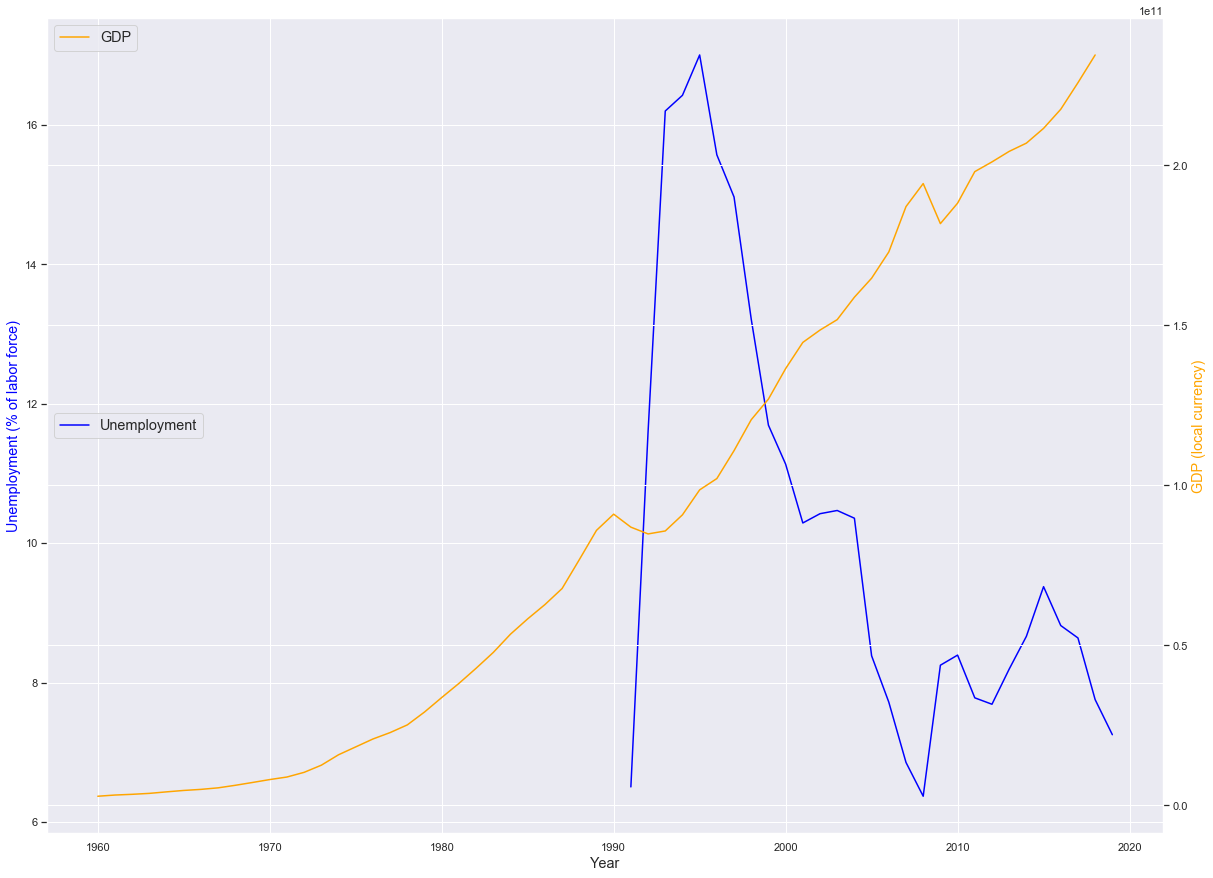

In [8]:
#Plotting data with seaborn being set and bigger plot size
import seaborn
seaborn.set()
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[20,15]
fig, ax1 = plt.subplots()
ax1.set_xlabel('Year', fontsize='large')
ax1.set_ylabel('Unemployment (% of labor force)', color='blue', fontsize='large')
ax1.plot([x[0] for x in dataUEM],[x[1] for x in dataUEM], color='blue')
ax1.legend(["Unemployment"], loc='center left', fontsize='large')
ax2 = ax1.twinx()
ax2.set_ylabel('GDP (local currency)', color='orange', fontsize='large')
ax2.plot([x[0] for x in dataGDPc],[x[1] for x in dataGDPc], c='orange')
ax2.legend(["GDP"], loc='upper left',fontsize='large')
plt.savefig('unemployment_vs_gdp.pdf')